# Bandits Gym Environment

In [56]:
import gym
import gym_bandits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import trange


In [57]:
np.random.seed(30)

BanditTenArmedGaussian-v0: 10 armed bandit mentioned on page 30 of Reinforcement Learning: An Introduction (Sutton and Barto)

In [58]:
env = gym.make("BanditTenArmedGaussian-v0") # Replace with relevant env
env.reset()

0

In [59]:
print(env.action_space)

Discrete(10)


Let us check what the output of a single step is. 
Choose action 1.

In [60]:
env.step(1)

(0, 2.1798549846907833, True, {})

Now let us choose a different action (bandit arm), action 2:

In [61]:
env.step(2)

(0, -2.2888206360875216, True, {})

In [62]:
runs = 1000
actions = 10
rewards = np.zeros((actions, runs))

for act in range(actions):
    for r in range(runs):
        observation, rewards[act, r], done, info = env.step(act)
   
    

Text(0, 0.5, 'Reward distribution')

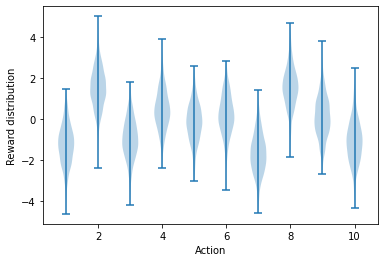

In [63]:
plt.violinplot(dataset=rewards.T) # transpose dataset
plt.xlabel("Action")
plt.ylabel("Reward distribution")


(array([  1.,   3.,  30., 137., 243., 292., 189.,  85.,  17.,   3.]),
 array([-2.36410174, -1.62553389, -0.88696604, -0.14839819,  0.59016966,
         1.32873751,  2.06730536,  2.80587321,  3.54444106,  4.28300891,
         5.02157676]),
 <BarContainer object of 10 artists>)

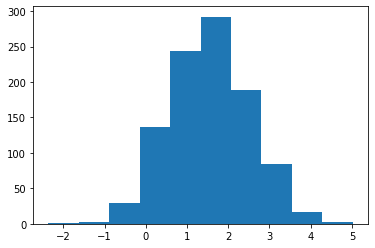

In [65]:
# best action
plt.hist(rewards[1,])

# Implement a basic Q-Learning algorithm

Now that we have our Ten-armed bandit enviroment, let's code up an Agent that uses an action-value method that chooses the action with the highest Q-value with probability 1- eps and chooses a random action with probability eps.

We implement the pseudo code on page 32 of Sutton & Barto.

We need an array of size 10, `q_table` to hold for each action its current estimated Q-value.
Choose `step_size = 0.1`

Hint: write a separate function choose_action() that takes as arguments a list possible action values, the current q_table, and a value of epsilon.
let it return an action value from the list.


In [14]:
def choose_action(actions, q_table, epsilon = 0.1):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    q_best = np.max(q_table)
    # choose FROM ACTIONS WITH BEST Q-VAL at random
    return np.random.choice(np.where(q_table == q_best)[0])


In [75]:
step_size = 0.1
time = 10000
eps = 0.1
actions = range(10)

action_size = env.action_space.n

# init q_table
q_table = np.zeros(action_size)

for t in range(time):
    action = choose_action(actions, q_table, epsilon = eps)
    # play action, collect reward
    observation, reward, done, info  =  env.step(action)
    # update q_table for the chosen action
    q_table[action] += step_size * (reward - q_table[action])


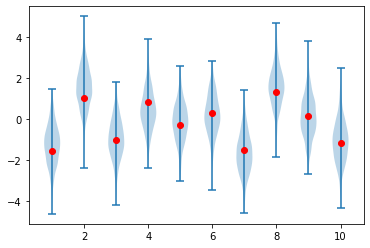

In [76]:
plt.violinplot(dataset=rewards.T) 
plt.plot(np.linspace(1, 10, 10), q_table, 'o', color = "red")